# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np

filename = "../../assets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

                zip      beds     baths    sq__ft     price  latitude  \
zip        1.000000  0.125319  0.069165  0.130108 -0.093353 -0.290389   
beds       0.125319  1.000000  0.839650  0.684041  0.342024 -0.291307   
baths      0.069165  0.839650  1.000000  0.665690  0.416208 -0.235792   
sq__ft     0.130108  0.684041  0.665690  1.000000  0.333897 -0.383274   
price     -0.093353  0.342024  0.416208  0.333897  1.000000 -0.039573   
latitude  -0.290389 -0.291307 -0.235792 -0.383274 -0.039573  1.000000   
longitude -0.539904 -0.053993  0.016582 -0.177742  0.284485  0.387925   

           longitude  
zip        -0.539904  
beds       -0.053993  
baths       0.016582  
sq__ft     -0.177742  
price       0.284485  
latitude    0.387925  
longitude   1.000000  


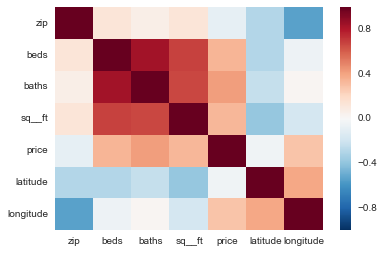

In [102]:

print data.corr()
#data.dtypes
#data.describe()

sns.heatmap(data.corr())

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

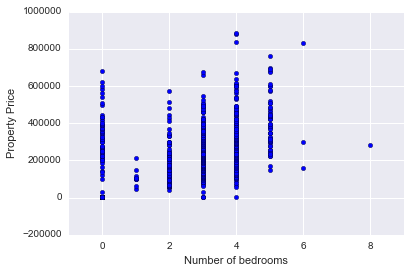

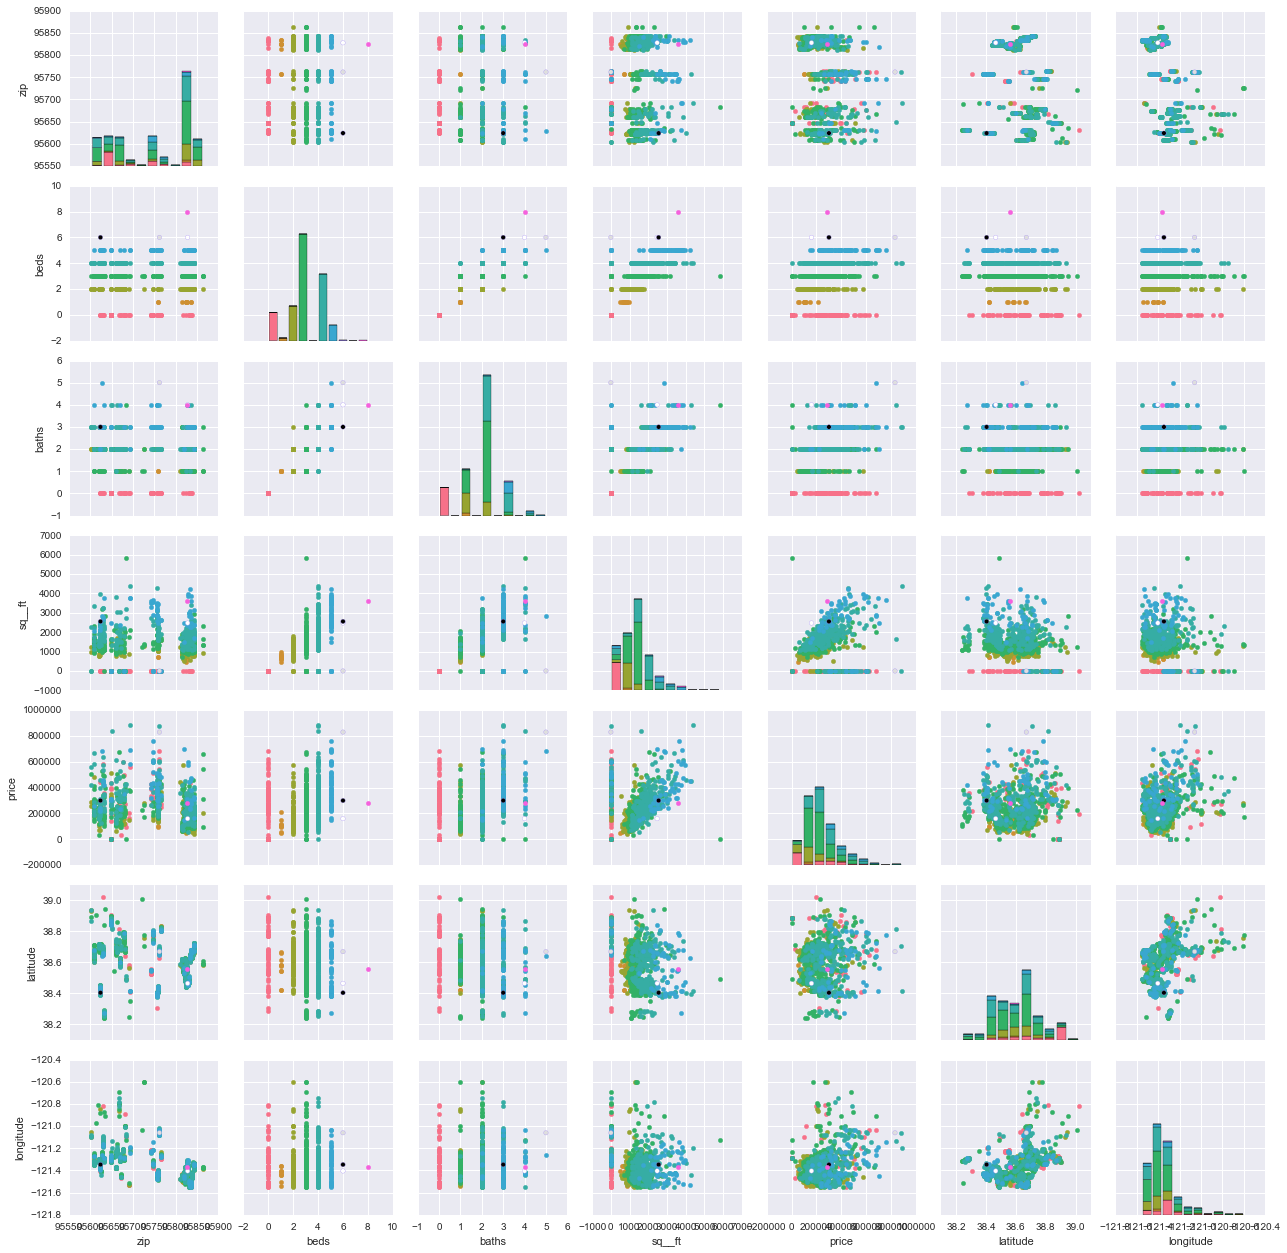

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of bedrooms")
plt.ylabel("Property Price")
plt.show()

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

g = sns.PairGrid(data, hue="beds")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

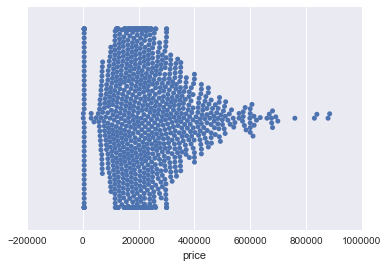

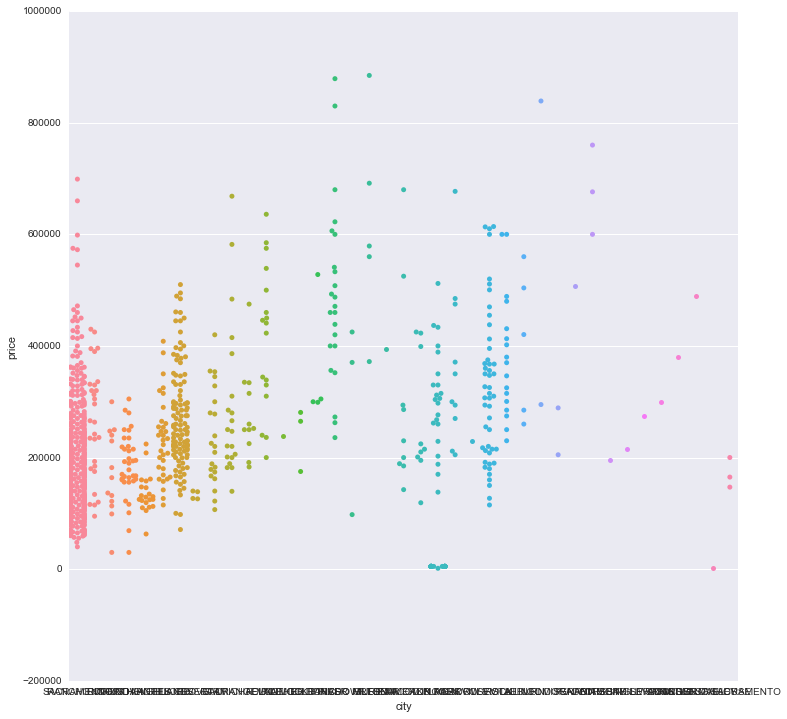

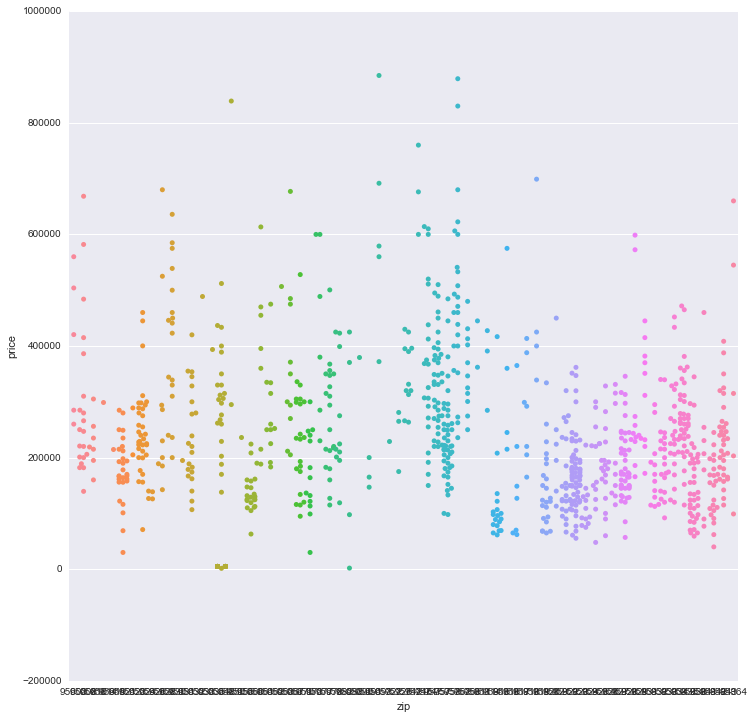

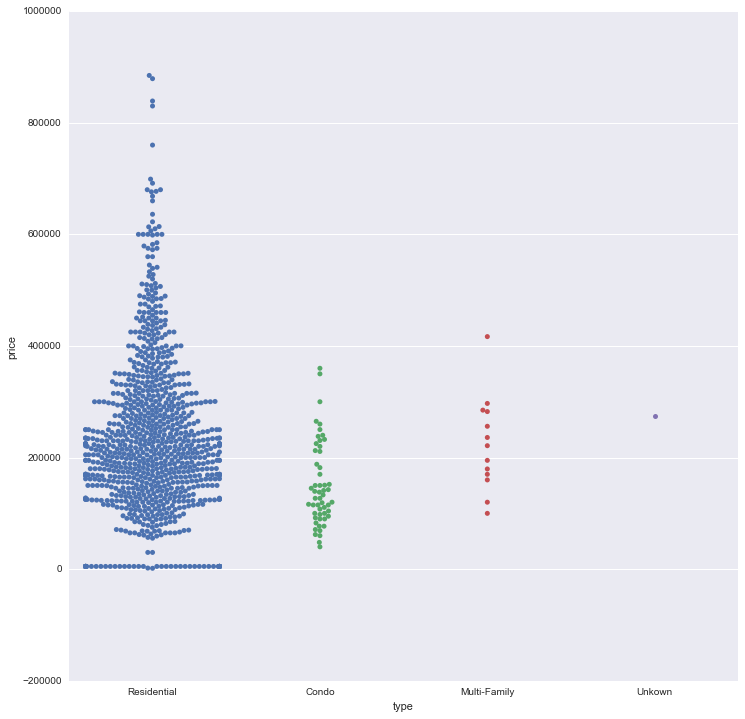

In [107]:
sns.swarmplot(x=data["price"])

for column in ['city', 'zip','type']:
    plt.figure(figsize=(12,12))
    sns.swarmplot(x=column, y='price', data = data);
    sns.plt.show()
#sns.swarmplot(x="price", y="beds", data = data)

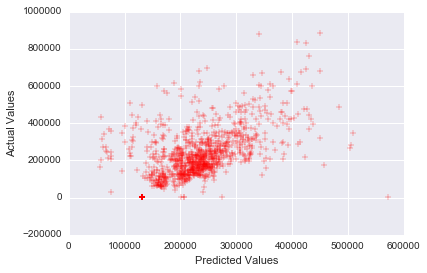

MSE: 13851905635.7


In [111]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

lm = linear_model.LinearRegression()

X = data[["sq__ft", "zip", "beds", "baths", "latitude", "longitude"]]
y = data["price"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [ ]:
These